<a href="https://colab.research.google.com/github/rohinikoli10/car_price_prediction/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
file_path = '/content/used_car_dataset.csv'

In [3]:
data = pd.read_csv(file_path)

In [4]:
data.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,?? 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,?? 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,?? 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,?? 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],?? 12 Lakh,"11,193 km",Petrol,Kolkata,2019


# **Data Preprocessing**

In [5]:
# Convert 'car_price_in_rupees' to numerical values

data['car_price_in_rupees'] = data['car_price_in_rupees'].apply(lambda x: float(re.sub(r'[^\d.]', '', x.split(' ')[1])))

In [6]:
# Convert 'kms_driven' to numerical values

data['kms_driven'] = data['kms_driven'].apply(lambda x: int(re.sub(r'[^\d.]', '', x.split(' ')[0])))

In [7]:
# Handle missing values

data = data.dropna(subset=['car_name', 'car_price_in_rupees', 'kms_driven', 'fuel_type', 'city', 'year_of_manufacture'])

In [8]:
data = data.drop_duplicates()

# **Feature Selection**

In [9]:
data['car_age'] = 2024 - data['year_of_manufacture']

In [10]:
print(data['fuel_type'].unique())

['Petrol' 'Diesel' 'Diesel + 1' 'Electric' 'CNG' 'Petrol + 1' 'Hybrid'
 'LPG']


In [11]:
# Encode 'fuel_type'

fuel_type_mapping = {
    'Petrol': 0,
    'Diesel': 1,
    'Diesel + 1': 2,
    'Electric': 3,
    'CNG': 4,
    'Petrol + 1': 5,
    'Hybrid': 6,
    'LPG': 7
}
data['fuel_type'] = data['fuel_type'].replace(fuel_type_mapping)

In [12]:
print(data['city'].unique())

['Mumbai' 'Kolkata' 'Bangalore' 'Thane' 'Chennai' 'Ahmedabad'
 'Pallikarnai' 'Hyderabad' 'Pune' 'Gurgaon' 'Delhi' 'Noida' 'Faridabad'
 'Thiruvallur' 'Ambattur' 'Poonamallee']


In [13]:
# Encode 'city'

city_mapping = {
    'Mumbai': 0,
    'Kolkata': 1,
    'Bangalore': 2,
    'Thane': 3,
    'Chennai': 4,
    'Ahmedabad': 5,
    'Pallikarnai': 6,
    'Hyderabad': 7,
    'Pune': 8,
    'Gurgaon' : 9,
    'Delhi' : 10,
    'Noida' : 11,
    'Faridabad' : 12,
    'Thiruvallur' : 13,
    'Ambattur' : 14,
    'Poonamallee' : 15
}
data['city'] = data['city'].replace(city_mapping)

In [14]:
data.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_age
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,0,0,2016,8
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,0,1,2019,5
2,Tata Safari XZ Plus New,22.49,12999,1,2,2021,3
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,0,3,2016,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,0,1,2019,5


# **Data Splitting**

In [15]:
x = data.drop(['car_name'], axis = 1)
y = data['car_price_in_rupees']


In [16]:
print(x)

      car_price_in_rupees  kms_driven  fuel_type  city  year_of_manufacture  \
0                    4.45       22402          0     0                 2016   
1                    2.93       10344          0     1                 2019   
2                   22.49       12999          1     2                 2021   
3                    6.95       45000          0     3                 2016   
4                   12.00       11193          0     1                 2019   
...                   ...         ...        ...   ...                  ...   
2100                 3.60       42158          1     1                 2015   
2101                22.00       68862          1     7                 2013   
2102                 8.38       37622          0     4                 2018   
2103                 6.75       64726          0     0                 2017   
2104                 8.76       29150          0     8                 2017   

      car_age  
0           8  
1           5  
2  

In [17]:
print(y)

0        4.45
1        2.93
2       22.49
3        6.95
4       12.00
        ...  
2100     3.60
2101    22.00
2102     8.38
2103     6.75
2104     8.76
Name: car_price_in_rupees, Length: 2013, dtype: float64


model training

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

# **Selecting a Model**



1.   Linear Regression



In [19]:
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

# **Model Training**

In [21]:
training_data_prediction = lin_reg_model.predict(x_train)

In [23]:
from sklearn import metrics

In [24]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


<ipython-input-47-0620dfb6f3c7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(x=y_train, y=training_data_prediction, alpha=0.6, s=70, palette='viridis')
<ipython-input-47-0620dfb6f3c7>:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Predicted Price')


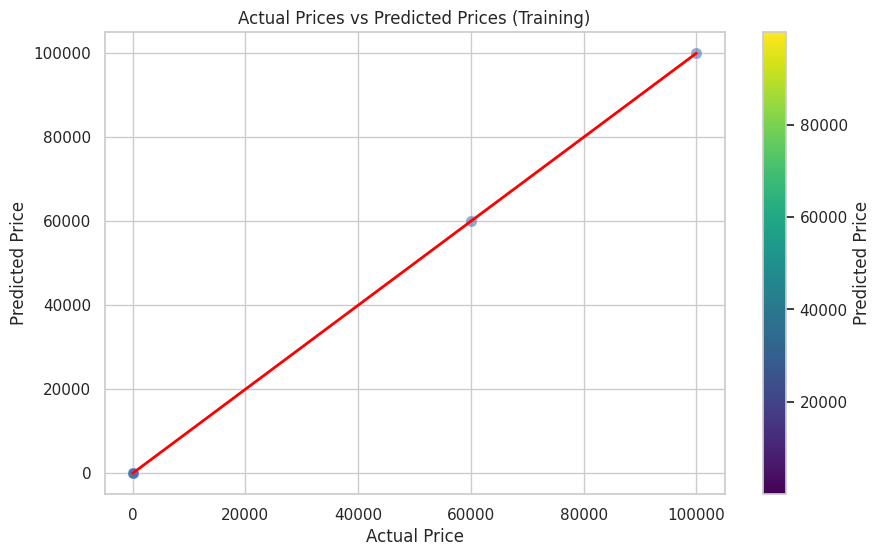

In [47]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
scatter = sns.scatterplot(x=y_train, y=training_data_prediction, alpha=0.6, s=70, palette='viridis')
sns.regplot(x=y_train, y=training_data_prediction, scatter=False, color='red', line_kws={'lw':2})

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Training)")

norm = plt.Normalize(training_data_prediction.min(), training_data_prediction.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Predicted Price')

plt.show()


# **Evaluating the model**

In [26]:
test_data_prediction = lin_reg_model.predict(x_test)

In [27]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


In [28]:
mse_test = mean_squared_error(y_test, test_data_prediction)
print("Mean Squared Error (Test Set): ", mse_test)

Mean Squared Error (Test Set):  3.0083396285351726e-25


<ipython-input-48-0506f66b648d>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(x=y_test, y=test_data_prediction, alpha=0.6, s=70, palette='viridis')
<ipython-input-48-0506f66b648d>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Predicted Price')


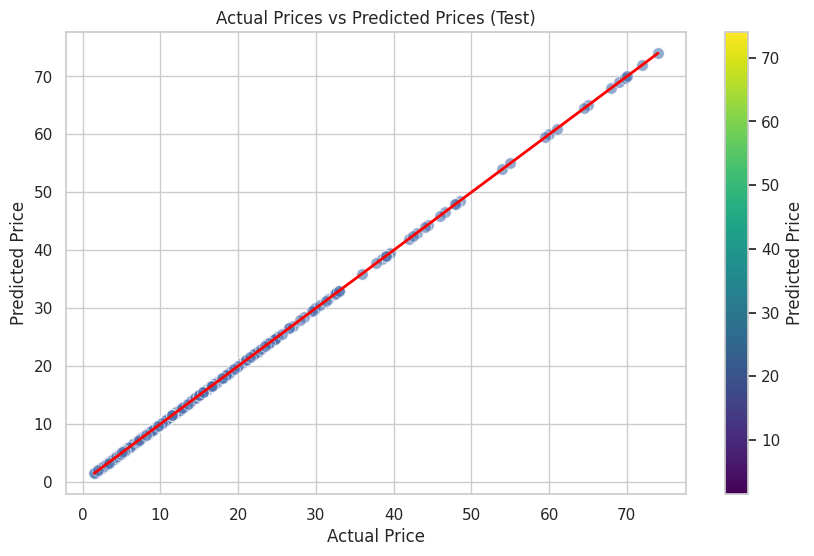

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

scatter = sns.scatterplot(x=y_test, y=test_data_prediction, alpha=0.6, s=70, palette='viridis')
sns.regplot(x=y_test, y=test_data_prediction, scatter=False, color='red', line_kws={'lw':2})

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Test)")

norm = plt.Normalize(test_data_prediction.min(), test_data_prediction.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Predicted Price')

plt.show()


# **Applying Cross Validation**

for better understanding of model's performance and detect overfitting

In [30]:
# Perform cross-validation (5-fold cross-validation)

cv_scores = cross_val_score(lin_reg_model, x, y, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))

Cross-validation R-squared scores: [1. 1. 1. 1. 1.]
Mean R-squared score: 1.0


In [31]:
#compute MSE scores

cv_mse_scores = cross_val_score(lin_reg_model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores
print("Cross-validation MSE scores:", cv_mse_scores)
print("Mean MSE score:", np.mean(cv_mse_scores))

Cross-validation MSE scores: [3.90229891e-25 2.71134746e-23 1.08645428e-25 1.32331784e-23
 1.00817567e-25]
Mean MSE score: 8.189269170223442e-24


<ipython-input-32-e13d2603ed87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, len(cv_scores) + 1), y=cv_scores, palette='viridis')


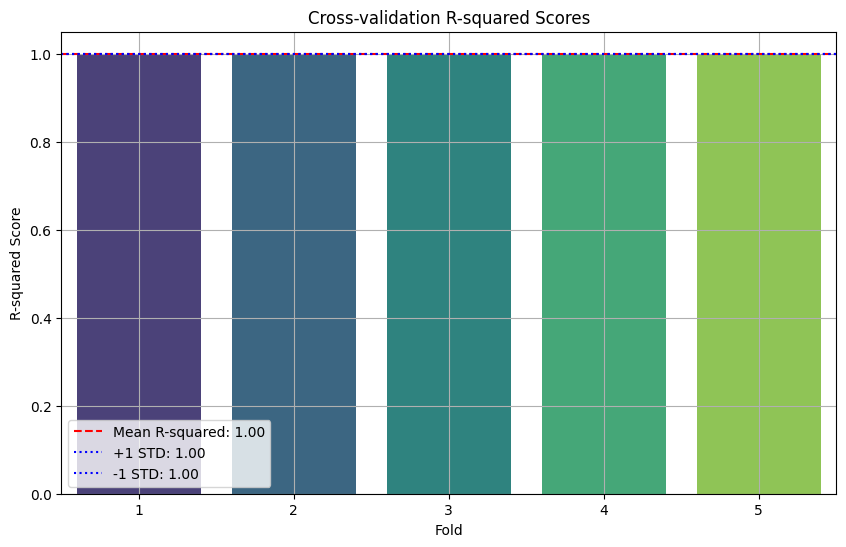

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(cv_scores) + 1), y=cv_scores, palette='viridis')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean R-squared: {np.mean(cv_scores):.2f}')
plt.axhline(y=np.mean(cv_scores) + np.std(cv_scores), color='b', linestyle=':', label=f'+1 STD: {np.mean(cv_scores) + np.std(cv_scores):.2f}')
plt.axhline(y=np.mean(cv_scores) - np.std(cv_scores), color='b', linestyle=':', label=f'-1 STD: {np.mean(cv_scores) - np.std(cv_scores):.2f}')
plt.xlabel('Fold')
plt.ylabel('R-squared Score')
plt.title('Cross-validation R-squared Scores')
plt.legend()
plt.grid(True)
plt.show()

# **Selecting a Model**

2. Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_reg_model = Lasso(alpha=0.1)

In [35]:
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [36]:
training_data_prediction = lasso_reg_model.predict(x_train)

In [37]:
r2_train = r2_score(y_train, training_data_prediction)
print("R squared Error (Training): ", r2_train)

R squared Error (Training):  0.9999999999999999


<ipython-input-46-7eb60ffa5995>:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Predicted Price')


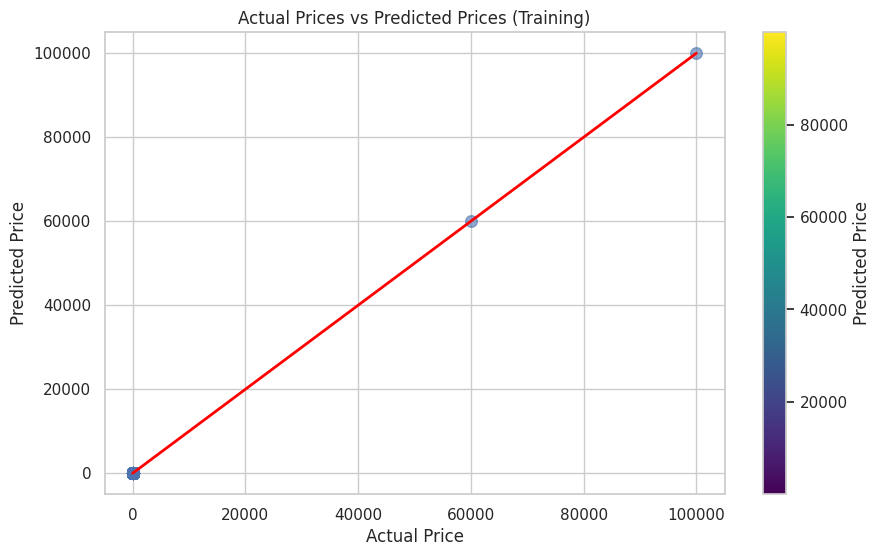

In [46]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
scatter = sns.regplot(x=y_train, y=training_data_prediction, scatter_kws={'alpha':0.6, 's':70}, line_kws={'color':'red', 'lw':2})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Training)")
norm = plt.Normalize(training_data_prediction.min(), training_data_prediction.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Predicted Price')

plt.show()

In [40]:
test_data_prediction = lasso_reg_model.predict(x_test)

In [41]:
r2_test = r2_score(y_test, test_data_prediction)
print("R squared Error (Test): ", r2_test)
mse_test = mean_squared_error(y_test, test_data_prediction)
print("Mean Squared Error (Test Set): ", mse_test)

R squared Error (Test):  0.99999999999999
Mean Squared Error (Test Set):  1.3993234928197206e-12


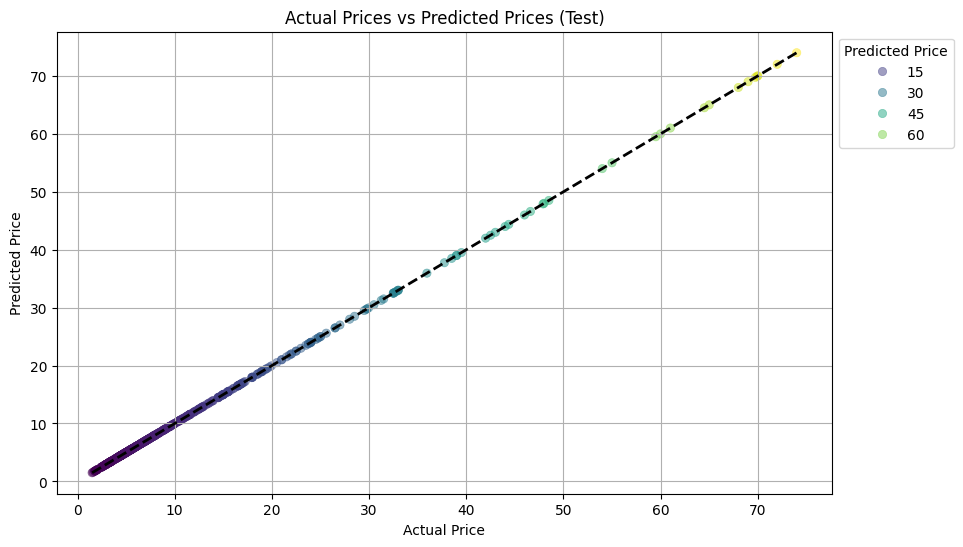

In [43]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=y_test, y=test_data_prediction, alpha=0.5, hue=test_data_prediction, palette='viridis', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Test)")
plt.grid(True)
scatter.legend(title='Predicted Price', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()